In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # Corrected import statement
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


In [25]:
#Read data
teams = pd.read_csv("/Users/becky/OneDrive/Documents/Classes/AAI500/Final/Data/Teams.csv")
data = teams[['W', 'SO', 'BB', 'SB', 'HA', 'HRA', 'ERA']] 

In [27]:
# Descriptive Statistics 
print(teams.describe()) 

            yearID         Rank           G        Ghome            W  \
count  2805.000000  2805.000000  2805.00000  2406.000000  2805.000000   
mean   1955.036720     4.107308   150.34795    78.465919    74.749020   
std      41.519083     2.323414    23.22725     4.698684    17.640402   
min    1871.000000     1.000000     6.00000    44.000000     0.000000   
25%    1919.000000     2.000000   153.00000    77.000000    66.000000   
50%    1963.000000     4.000000   157.00000    81.000000    77.000000   
75%    1992.000000     6.000000   162.00000    81.000000    87.000000   
max    2015.000000    13.000000   165.00000    84.000000   116.000000   

                 L            R           AB            H           2B  ...  \
count  2805.000000  2805.000000  2805.000000  2805.000000  2805.000000  ...   
mean     74.749020   681.945811  5142.492335  1346.273440   227.624955  ...   
std      17.378079   135.738244   750.551691   219.891603    58.692602  ...   
min       4.000000    24.0

Shape before dropping missing values: (2805, 48)
Shape after dropping missing values: (480, 48)

R-squared score: 0.5715333559656821
Root Mean Squared Error: 7.557747088806819

Feature coefficients:
SO: -0.0219
BB: 0.0619
SB: 0.0079
HA: 0.0163
HRA: 0.0568
ERA: -18.7103


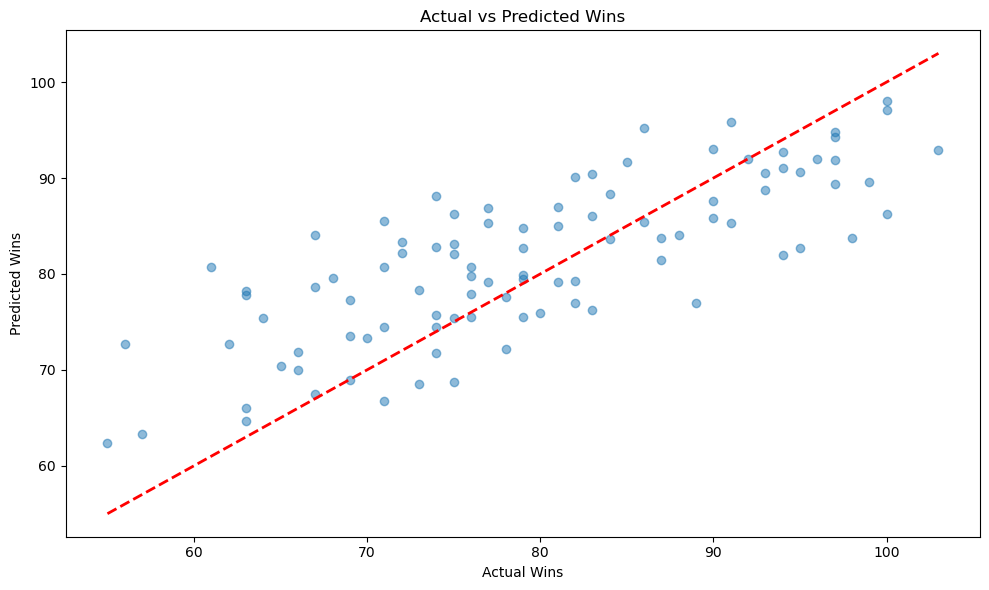

In [35]:
# Read the CSV file
df = pd.read_csv('/Users/becky/OneDrive/Documents/Classes/AAI500/Final/Data/Teams.csv')
# Select features and target
X = df[['SO', 'BB', 'SB', 'HA', 'HRA', 'ERA']]
y = df['W']

# Check the number of missing values in each column
#print("Number of missing values in each column:")
#print(df.isnull().sum())

# Check the total number of missing values
#print("\nTotal number of missing values in dataset:")
#print(df.isnull().sum().sum())

# Check the percentage of missing values in each column
#print("\nPercentage of missing values in each column:")
#print((df.isnull().sum() / len(df)) * 100)

# Display info about the dataframe including non-null counts
#print("\nDataframe Info:")
#df.info()

#First, let's see the shape of the dataset before dropping
print("Shape before dropping missing values:", df.shape)

# Drop rows with missing values and create a new dataframe
df_cleaned = df.dropna()

# See the shape after dropping missing values
print("Shape after dropping missing values:", df_cleaned.shape)

# Now proceed with the analysis using the cleaned dataframe
# Select features and target
X = df_cleaned[['SO', 'BB', 'SB', 'HA', 'HRA', 'ERA']]
y = df_cleaned['W']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print results
print("\nR-squared score:", r2)
print("Root Mean Squared Error:", rmse)
print("\nFeature coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

# Create a scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.title('Actual vs Predicted Wins')
plt.tight_layout()
plt.show()



Model Performance Metrics:
R-squared Score: 0.5715
Root Mean Squared Error: 7.5577
Mean Absolute Error: 6.0798

Model Parameters:
Intercept: 118.8140

Feature Coefficients:
SO: -0.0219
BB: 0.0619
SB: 0.0079
HA: 0.0163
HRA: 0.0568
ERA: -18.7103


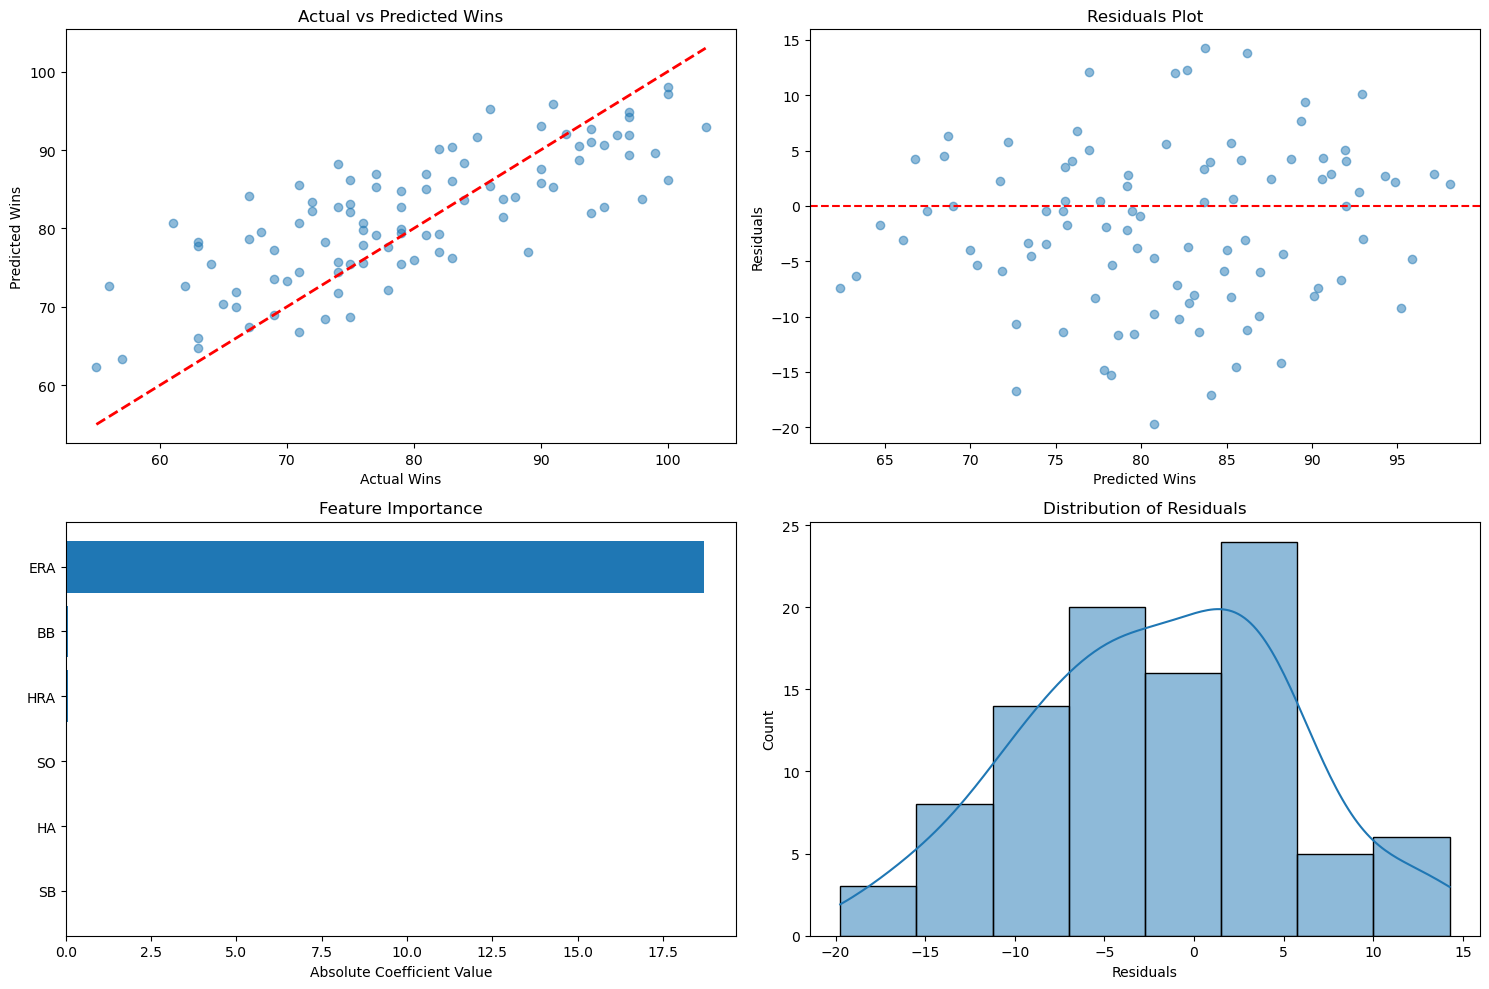

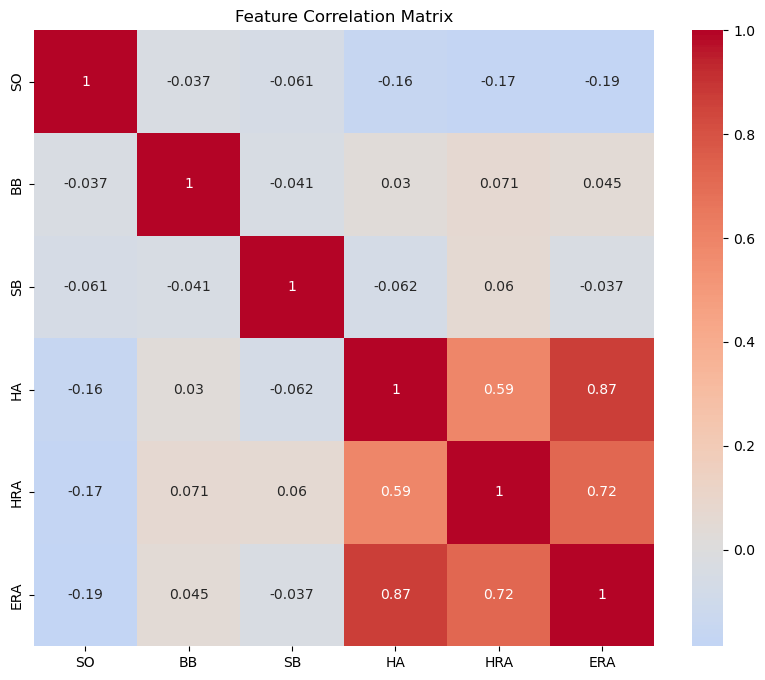


Summary Statistics of Features:
                SO          BB          SB           HA         HRA  \
count   480.000000  480.000000  480.000000   480.000000  480.000000   
mean   1115.756250  522.350000   94.556250  1448.314583  166.672917   
std     131.599399   71.227724   29.953704    88.471024   25.181663   
min     805.000000  363.000000   31.000000  1233.000000   96.000000   
25%    1023.750000  471.000000   71.000000  1383.750000  150.750000   
50%    1104.000000  520.000000   91.500000  1447.500000  166.000000   
75%    1207.000000  567.000000  115.000000  1506.500000  182.000000   
max    1535.000000  775.000000  200.000000  1683.000000  239.000000   

              ERA  
count  480.000000  
mean     4.236125  
std      0.535741  
min      2.940000  
25%      3.857500  
50%      4.200000  
75%      4.592500  
max      5.710000  

Prediction Interval:
Average prediction ± 14.8132 wins (95% confidence)


In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

#Calculate Multiple Linear Regression
# Calculate performance metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Print model performance
print("Model Performance Metrics:")
print(f"R-squared Score: {r2:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

# Print coefficients and intercept
print("\nModel Parameters:")
print(f"Intercept: {model.intercept_:.4f}")
print("\nFeature Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

# Create visualizations
plt.figure(figsize=(15, 10))

# 1. Actual vs Predicted Values
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.title('Actual vs Predicted Wins')

# 2. Residuals Plot
residuals = y_test - y_pred
plt.subplot(2, 2, 2)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Wins')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot')

# 3. Feature Importance Plot
plt.subplot(2, 2, 3)
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': abs(model.coef_)
})
importance = importance.sort_values('Coefficient', ascending=True)
plt.barh(importance['Feature'], importance['Coefficient'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance')

# 4. Residuals Distribution
plt.subplot(2, 2, 4)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()

# Additional Analysis: Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

# Print summary statistics
print("\nSummary Statistics of Features:")
print(X.describe())

# Calculate and print confidence intervals for predictions
from scipy import stats

# Calculate standard error of predictions
mse = mean_squared_error(y_test, y_pred)
std_error = np.sqrt(mse)

# Calculate 95% confidence intervals
confidence_interval = 1.96 * std_error  # 95% confidence interval

print("\nPrediction Interval:")
print(f"Average prediction ± {confidence_interval:.4f} wins (95% confidence)")